In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inline
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.python import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import minimize
from scipy import optimize



import seaborn as sns

Using TensorFlow backend.


In [2]:
train= pd.read_csv("new_train.csv")
train_copy= pd.read_csv("new_train.csv")
test= pd.read_csv("new_test.csv")
test_copy= pd.read_csv("new_test.csv")

In [3]:
train.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [4]:
def day_of_year (day, month, year):
    ans=day
    if(month>1):
        ans+=31
    if(month>2):
        ans+=28
        if(year%4==0):
            ans+=1
    if(month>3):
        ans+=31
    if(month>4):
        ans+=30
    if(month>5):
        ans+=31
    if(month>6):
        ans+=30
    if(month>7):
        ans+=31
    if(month>8):
        ans+=31
    if(month>9):
        ans+=30
    if(month>10):
        ans+=31
    if(month>11):
        ans+=30
    return ans
    

In [5]:
def func(r):
    d=r['day']= (int)(r['date'][:2])
    m= r['month']= (int)(r['date'][3:5])
    y= r['year']= (int)(r['date'][-4:])
    r['total']= day_of_year(d, m, y)
    return r

train= train.apply(func, axis=1)
test= test.apply(func, axis=1)

In [6]:
train.head()

,date,temp,day,month,year,total
0,01-01-1980,4.16,1,1,1980,1
1,02-01-1980,4.06,2,1,1980,2
2,03-01-1980,7.12,3,1,1980,3
3,04-01-1980,9.23,4,1,1980,4
4,05-01-1980,3.20,5,1,1980,5


In [7]:
def test_func1(x, a, b,c, d, e, f):
    return a * np.sin((b * np.pi*x)+c) +d*(x**2) + e*(x)+ f
def test_func2(x, a, b,c, d, e, f):
    return a*(x**5)+ b*(x**4)+ c*(x**3) + d*(x**2) + e*x + f

In [8]:
param_day, _= optimize.curve_fit(test_func1, ((train.day-15.5)/15.5), train.temp,
                                               p0=[0.01, -0.01, 0.001, -0.001, 0.001,  0.0001], maxfev=3000)
param_month, _= optimize.curve_fit(test_func1, ((train.month-6)/6), train.temp,
                                               p0=[0.01, -0.01, 0.001, -0.001, 0.001, 0.0001], maxfev=3000)
param_year, _= optimize.curve_fit(test_func2, train.year/2000, train.temp,
                                               p0=[0.01, -0.01, 0.01, -0.001, 0.001, 0.0001], maxfev=3000)
param_total, _= optimize.curve_fit(test_func1, ((train.total-183)/183), train.temp,
                                               p0=[0.01, -0.01, 0.001, -0.001, 0.001, 0.0001], maxfev=3000)


In [9]:
train['day_opt']= param_day[0]*( np.sin(param_day[1]*np.pi*((train.day-15.5)/15.5)+ param_day[2]))+ param_day[3]*(((train.day-15.5)/15.5)**2) + param_day[4]*(((train.day-15.5)/15.5))+param_day[5]
train['month_opt']= param_month[0]*( np.sin(param_month[1]*np.pi*((train.month-6)/6)+ param_month[2]))+ param_month[3]*(((train.month-6)/6)**2) + param_month[4]*(((train.month-6)/6))+param_month[5]
train['total_opt']= param_total[0]*( np.sin(param_total[1]*np.pi*((train.total-183)/183)+ param_total[2]))+ param_total[3]*(((train.total-183)/183)**2) + param_total[4]*(((train.total-183)/183))+param_total[5]
train['year_opt']= param_year[0]*((train.year/2000)**5)+ param_year[1]*((train.year/2000)**4)+ param_year[2]*((train.year/2000)**3) + param_year[3]*((train.year/2000)**2) + param_year[4]*(train.year/2000) + param_year[5]

test['day_opt']= param_day[0]*( np.sin(param_day[1]*np.pi*((test.day-15.5)/15.5)+ param_day[2]))+ param_day[3]*(((test.day-15.5)/15.5)**2) + param_day[4]*(((test.day-15.5)/15.5))+param_day[5]
test['month_opt']= param_month[0]*( np.sin(param_month[1]*np.pi*((test.month-6)/6)+ param_month[2]))+ param_month[3]*(((test.month-6)/6)**2) + param_month[4]*(((test.month-6)/6))+param_month[5]
test['total_opt']= param_total[0]*( np.sin(param_total[1]*np.pi*((test.total-183)/183)+ param_total[2]))+ param_total[3]*(((test.total-183)/183)**2) + param_total[4]*(((test.total-183)/183))+param_total[5]
test['year_opt']= param_year[0]*((test.year/2000)**5)+ param_year[1]*((test.year/2000)**4)+ param_year[2]*((test.year/2000)**3) + param_year[3]*((test.year/2000)**2) + param_year[4]*(test.year/2000) + param_year[5]

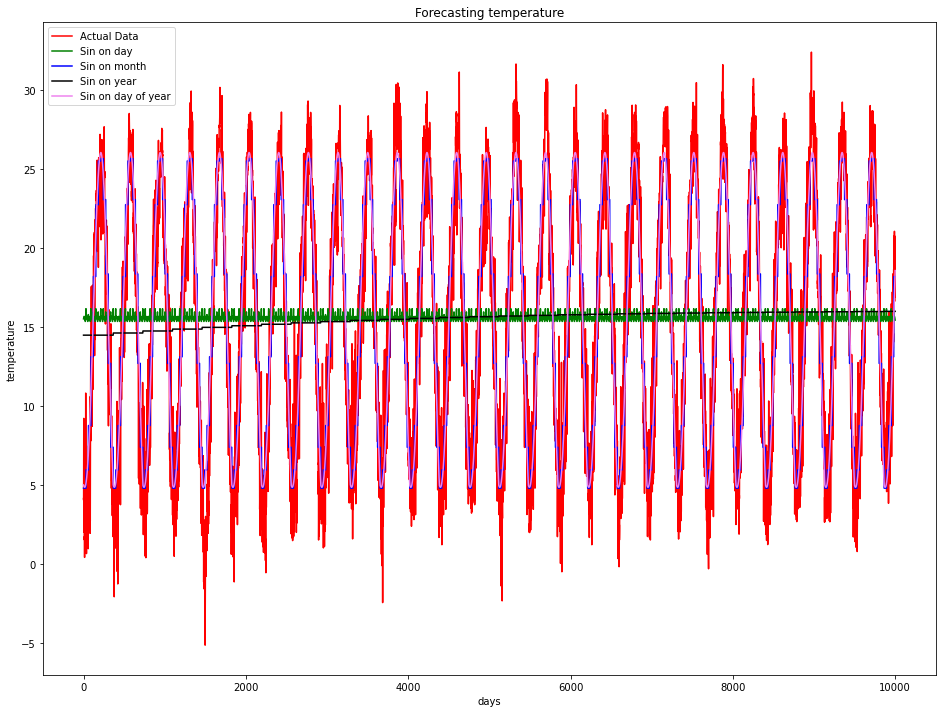

In [10]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(train.temp[:10000], color= 'red', label='Actual Data')
pyplot.plot(train.day_opt[:10000], color='green', label='Sin on day')
pyplot.plot(train.month_opt[:10000], color='blue', label='Sin on month')
pyplot.plot(train.year_opt[:10000], color='black', label='Sin on year')
pyplot.plot(train.total_opt[:10000], color='violet', label='Sin on day of year')
pyplot.title("Forecasting temperature")
pyplot.xlabel("days")
pyplot.ylabel("temperature")
pyplot.legend()
pyplot.show()

In [11]:
train['month_opt']/=40
train['year_opt']/=40
train['total_opt']/=40
train['temp']/=40

test['month_opt']/=40
test['year_opt']/=40
test['total_opt']/=40

train['day']/= 31
train['month']/=12
train['year']/=2000
train['total']/=366

test['day']/=31
test['month']/=12
test['year']/=2000
test['total']/=366

In [12]:
input_data= train.drop(columns=['date', 'temp', 'day_opt']).values
lookback= 90   #90 30 15

test_size=int(.1 * len(train))
x=[]
y=[]
for i in range(len(train)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    x.append(t)
    y.append(train.values[i+ lookback,1])
    
X__test= test.drop(columns= ['date', 'day_opt']).values
X__test=np.append(train.tail(lookback).drop(columns=['date','temp','day_opt']).values,X__test,axis=0)
X_test=[]
for i in range(len(X__test)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(X__test[[(i+j)], :])
    X_test.append(t)

In [13]:
X_test=np.array(X_test)

X_test = X_test.reshape(X_test.shape[0],lookback, -1)
print(X__test.shape)
X_test.shape

(3651, 7)


(3561, 90, 7)

In [14]:
x, y= np.array(x), np.array(y)
test_size= -1*(test_size+lookback)
x_test = x[test_size:]
y_test=y[test_size:]
y_train= y[:test_size]
x_train= x[:test_size]
x = x.reshape(x.shape[0],lookback, -1)
x_train = x_train.reshape(x_train.shape[0],lookback, -1)
x_test = x_test.reshape(x_test.shape[0],lookback, -1)
print(x.shape)
print(x_test.shape)
print(x_train.shape)
print(y.shape)
print(y_test.shape)
print(y_train.shape)

(11233, 90, 7)
(1222, 90, 7)
(10011, 90, 7)
(11233,)
(1222,)
(10011,)


In [15]:
model90= load_model("Temperature.h5")

In [16]:
train['LSTM90']= train['temp']
train.LSTM90[90:]= model90.predict(x).reshape(-1)

In [17]:
test['LSTM90']=model90.predict(X_test).reshape(-1)

In [18]:
input_data= train.drop(columns=['date', 'temp', 'day_opt', 'LSTM90']).values
lookback= 30   #90 30 15

test_size=int(.1 * len(train))
x=[]
y=[]
for i in range(len(train)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    x.append(t)
    y.append(train.values[i+ lookback,1])
    
X__test= test.drop(columns= ['date', 'day_opt', 'LSTM90']).values
X__test=np.append(train.tail(lookback).drop(columns=['date','temp','day_opt', 'LSTM90']).values,X__test,axis=0)
X_test=[]
for i in range(len(X__test)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(X__test[[(i+j)], :])
    X_test.append(t)

In [19]:
X_test=np.array(X_test)

X_test = X_test.reshape(X_test.shape[0],lookback, -1)
print(X__test.shape)
X_test.shape

(3591, 7)


(3561, 30, 7)

In [20]:
x, y= np.array(x), np.array(y)
test_size= -1*(test_size+lookback)
x_test = x[test_size:]
y_test=y[test_size:]
y_train= y[:test_size]
x_train= x[:test_size]
x = x.reshape(x.shape[0],lookback, -1)
x_train = x_train.reshape(x_train.shape[0],lookback, -1)
x_test = x_test.reshape(x_test.shape[0],lookback, -1)
print(x.shape)
print(x_test.shape)
print(x_train.shape)
print(y.shape)
print(y_test.shape)
print(y_train.shape)

(11293, 30, 7)
(1162, 30, 7)
(10131, 30, 7)
(11293,)
(1162,)
(10131,)


In [21]:
'''model30 = Sequential()
model30.add(LSTM(units=35, return_sequences= True, input_shape=(x.shape[1],x.shape[2])))
model30.add(LSTM(units=35, return_sequences= True))
model30.add(LSTM(units=35))
model30.add(Dropout(0.2))
model30.add(Dense(units=28, activation='relu'))
model30.add(Dense(units=28, activation='linear'))
model30.add(Dense(units=1))
model30.summary()'''
model30= load_model('Temperature1.h5')

In [22]:
model30.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(lr=0.0001))


In [23]:
my_callbacks= [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0), 
              tf.keras.callbacks.ModelCheckpoint(
    "Temperature1.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')]

In [24]:
model30.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,verbose=1, callbacks= my_callbacks)

Epoch 1/10
159/159 [==============================] - ETA: 0s - loss: 0.0048
Epoch 00001: val_loss improved from inf to 0.00379, saving model to Temperature1.h5
159/159 [==============================] - 17s 106ms/step - loss: 0.0048 - val_loss: 0.0038 - lr: 1.0000e-04
Epoch 2/10
159/159 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00002: val_loss improved from 0.00379 to 0.00370, saving model to Temperature1.h5
159/159 [==============================] - 13s 79ms/step - loss: 0.0044 - val_loss: 0.0037 - lr: 1.0000e-04
Epoch 3/10
159/159 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00003: val_loss did not improve from 0.00370
159/159 [==============================] - 13s 82ms/step - loss: 0.0043 - val_loss: 0.0037 - lr: 1.0000e-04
Epoch 4/10
159/159 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00004: val_loss did not improve from 0.00370
159/159 [===

In [25]:
train['LSTM30']= train['temp']
train.LSTM30[30:]= model30.predict(x).reshape(-1)

In [26]:
test['LSTM30']=model30.predict(X_test).reshape(-1)


In [27]:
input_data= train.drop(columns=['date', 'temp', 'day_opt', 'LSTM90','LSTM30']).values
lookback= 15   #90 30 15

test_size=int(.1 * len(train))
x=[]
y=[]
for i in range(len(train)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    x.append(t)
    y.append(train.values[i+ lookback,1])
    
X__test= test.drop(columns= ['date', 'day_opt', 'LSTM90','LSTM30']).values
X__test=np.append(train.tail(lookback).drop(columns=['date','temp','day_opt', 'LSTM90','LSTM30']).values,X__test,axis=0)
X_test=[]
for i in range(len(X__test)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(X__test[[(i+j)], :])
    X_test.append(t)

In [28]:
X_test=np.array(X_test)

X_test = X_test.reshape(X_test.shape[0],lookback, -1)
print(X__test.shape)
X_test.shape

(3576, 7)


(3561, 15, 7)

In [29]:
x, y= np.array(x), np.array(y)
test_size= -1*(test_size+lookback)
x_test = x[test_size:]
y_test=y[test_size:]
y_train= y[:test_size]
x_train= x[:test_size]
x = x.reshape(x.shape[0],lookback, -1)
x_train = x_train.reshape(x_train.shape[0],lookback, -1)
x_test = x_test.reshape(x_test.shape[0],lookback, -1)
print(x.shape)
print(x_test.shape)
print(x_train.shape)
print(y.shape)
print(y_test.shape)
print(y_train.shape)

(11308, 15, 7)
(1147, 15, 7)
(10161, 15, 7)
(11308,)
(1147,)
(10161,)


In [30]:
'''model15 = Sequential()
model15.add(LSTM(units=35, return_sequences= True, input_shape=(x.shape[1],x.shape[2])))
model15.add(LSTM(units=35, return_sequences= True))
model15.add(LSTM(units=35))
model15.add(Dropout(0.2))
model15.add(Dense(units=28, activation='relu'))
model15.add(Dense(units=28, activation='linear'))
model15.add(Dense(units=1))
model15.summary()'''
model15= load_model("Temperature2.h5")

In [31]:
model15.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(lr=0.0001))
my_callbacks= [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0), 
              tf.keras.callbacks.ModelCheckpoint(
    "Temperature2.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')]

In [32]:
model15.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,verbose=1, callbacks= my_callbacks)

Epoch 1/10
159/159 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00001: val_loss improved from inf to 0.00392, saving model to Temperature2.h5
159/159 [==============================] - 14s 87ms/step - loss: 0.0045 - val_loss: 0.0039 - lr: 1.0000e-04
Epoch 2/10
159/159 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00002: val_loss improved from 0.00392 to 0.00381, saving model to Temperature2.h5
159/159 [==============================] - 10s 62ms/step - loss: 0.0043 - val_loss: 0.0038 - lr: 1.0000e-04
Epoch 3/10
159/159 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00003: val_loss improved from 0.00381 to 0.00363, saving model to Temperature2.h5
159/159 [==============================] - 9s 58ms/step - loss: 0.0042 - val_loss: 0.0036 - lr: 1.0000e-04
Epoch 4/10
159/159 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00004: val_loss did not improve from 0.00363
159/159 [==============================] - 9s 54ms/step - 

In [33]:
train['LSTM15']= train['temp']
train.LSTM15[15:]= model15.predict(x).reshape(-1)

In [34]:
test['LSTM15']=model15.predict(X_test).reshape(-1)

In [35]:
test.to_excel("changed_test.xlsx")
train.to_excel("changed_train.xlsx")

In [36]:
test.head()

,date,day,month,year,total,day_opt,month_opt,total_opt,year_opt,LSTM90,LSTM30,LSTM15
0,01-01-2011,0.032258,0.083333,1.0055,0.002732,15.522549,0.120457,0.125647,0.401217,0.156593,0.150894,0.140975
1,02-01-2011,0.064516,0.083333,1.0055,0.005464,15.557432,0.120457,0.125128,0.401217,0.158220,0.149181,0.138261
2,03-01-2011,0.096774,0.083333,1.0055,0.008197,15.589998,0.120457,0.124644,0.401217,0.160017,0.147015,0.133961
3,04-01-2011,0.129032,0.083333,1.0055,0.010929,15.618968,0.120457,0.124194,0.401217,0.161929,0.144948,0.128888
4,05-01-2011,0.161290,0.083333,1.0055,0.013661,15.643271,0.120457,0.123781,0.401217,0.163934,0.143151,0.124655


In [37]:
train.head()

,date,temp,day,month,year,total,day_opt,month_opt,total_opt,year_opt,LSTM90,LSTM30,LSTM15
0,01-01-1980,0.10400,0.032258,0.083333,0.99,0.002732,15.522549,0.120457,0.125647,0.362312,0.10400,0.10400,0.10400
1,02-01-1980,0.10150,0.064516,0.083333,0.99,0.005464,15.557432,0.120457,0.125128,0.362312,0.10150,0.10150,0.10150
2,03-01-1980,0.17800,0.096774,0.083333,0.99,0.008197,15.589998,0.120457,0.124644,0.362312,0.17800,0.17800,0.17800
3,04-01-1980,0.23075,0.129032,0.083333,0.99,0.010929,15.618968,0.120457,0.124194,0.362312,0.23075,0.23075,0.23075
4,05-01-1980,0.08000,0.161290,0.083333,0.99,0.013661,15.643271,0.120457,0.123781,0.362312,0.08000,0.08000,0.08000


In [38]:
def rmse(predictions, targets):
    predictions= np.array(predictions)
    targets= np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())

In [39]:
#for testing purpose
train_new= train[90:]

In [40]:
print("LSTM90 error :"+ str( rmse(train_new.LSTM90*40 , train_new.temp*40)))
print("LSTM30 error :"+ str( rmse(train_new.LSTM30*40 , train_new.temp*40)))
print("LSTM15 error :"+ str( rmse(train_new.LSTM15*40 , train_new.temp*40)))
print("month optimized error :" +str(rmse(train_new.month_opt*40, train_new.temp*40 )))
print("year optimized error :" +str(rmse(train_new.year_opt*40, train_new.temp*40 )))
print("total optimized error :" + str(rmse(train_new.total_opt*40, train_new.temp*40 )))

LSTM90 error :12.250096522437572
LSTM30 error :2.459995426426207
LSTM15 error :2.441936251524987
month optimized error :2.6934365901269643
year optimized error :7.845725395453441
total optimized error :2.4507995855892912


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [42]:
X= train_new.drop(columns=['date', 'temp', 'day_opt']).values
Y= train_new.temp.values
X_train, X_val, y_train, y_val= train_test_split( X, Y, test_size=0.15, random_state=101)

In [43]:
pipe1= Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=True)),
                 ('ext', RandomForestRegressor( random_state=101))])

In [44]:
t=pipe1.fit(X_train, y_train )
pred1= pipe1.predict(X_val)
print(rmse(y_train, pipe1.predict(X_train)))
rmse(y_val, pred1)

0.020747212030616545


0.05491614616329867

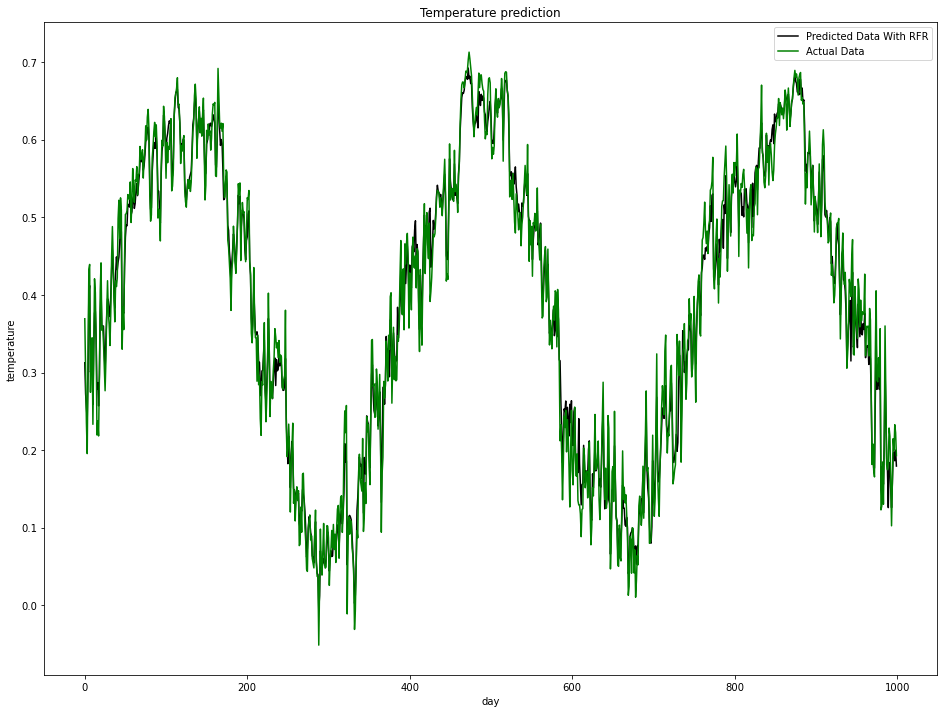

In [45]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe1.predict(X[:1000]), color= 'black', label='Predicted Data With RFR')
pyplot.plot(Y[:1000], color='green', label='Actual Data')
pyplot.title("Temperature prediction")
pyplot.xlabel("day")
pyplot.ylabel("temperature")
pyplot.legend()
pyplot.show()

In [46]:
train['RFR']= pipe1.predict(train.drop(columns=['date', 'temp', 'day_opt']).values)
test['RFR']= pipe1.predict(test.drop(columns=['date', 'day_opt']).values)

In [47]:
pipe2= Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=True)),
                 ('ext', KNeighborsRegressor( ))])

In [48]:
t=pipe2.fit(X_train, y_train )
pred1= pipe2.predict(X_val)
print(rmse(y_train, pipe2.predict(X_train)))
rmse(y_val, pred1)

0.05207332991883041


0.06373616930321489

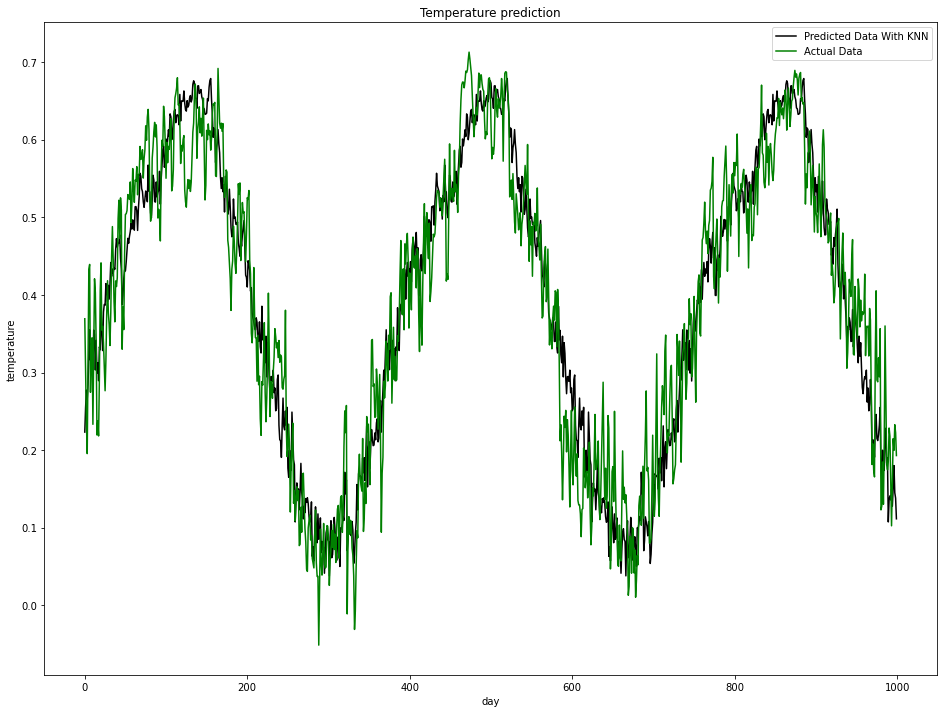

In [49]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe2.predict(X[:1000]), color= 'black', label='Predicted Data With KNN')
pyplot.plot(Y[:1000], color='green', label='Actual Data')
pyplot.title("Temperature prediction")
pyplot.xlabel("day")
pyplot.ylabel("temperature")
pyplot.legend()
pyplot.show()

In [50]:
train['KNN']= pipe2.predict(train.drop(columns=['date', 'temp', 'day_opt', 'RFR']).values)
test['KNN']= pipe2.predict(test.drop(columns=['date', 'day_opt', 'RFR']).values)

In [51]:
train_new= train[90:]
X= train_new.drop(columns=['date', 'temp', 'day_opt']).values
Y= train_new.temp.values
X_train, X_val, y_train, y_val= train_test_split( X, Y, test_size=0.2, random_state=101)

In [52]:
def my_RMSE(y_true, y_pred):
    return tf.math.reduce_mean(tf.sqrt(tf.square(tf.subtract(y_true, y_pred))))

In [53]:
X.shape

(11233, 12)

In [54]:

model = Sequential()
model.add(Dense(96, activation='relu', input_shape=[12]))
model.add(Dropout(0.2))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=24, activation='linear'))
model.add(Dense(units=12, activation='linear'))
model.add(Dense(units=12, activation='linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                1248      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 48)                4656      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                1

In [55]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(lr=0.0001))
my_callbacks= [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0), 
              tf.keras.callbacks.ModelCheckpoint(
    "TemperatureFinal.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')]

In [56]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=64,verbose=1, callbacks= my_callbacks)

Epoch 1/500
123/141 [=========================>....] - ETA: 0s - loss: 0.0371
Epoch 00001: val_loss improved from inf to 0.00648, saving model to TemperatureFinal.h5
141/141 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.0065 - lr: 1.0000e-04
Epoch 2/500
124/141 [=========================>....] - ETA: 0s - loss: 0.0080
Epoch 00002: val_loss improved from 0.00648 to 0.00364, saving model to TemperatureFinal.h5
141/141 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0036 - lr: 1.0000e-04
Epoch 3/500
137/141 [============================>.] - ETA: 0s - loss: 0.0057
Epoch 00003: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0038 - lr: 1.0000e-04
Epoch 4/500
136/141 [===========================>..] - ETA: 0s - loss: 0.0050
Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00004: val_loss did not improve from 0.00364
141/141

Epoch 31/500
131/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00031: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 6.1035e-09
Epoch 32/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00032: ReduceLROnPlateau reducing learning rate to 3.051757735406113e-09.

Epoch 00032: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 6.1035e-09
Epoch 33/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00033: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 3.0518e-09
Epoch 34/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0036
Epoch 00034: ReduceLROnPlateau reducing learning rate to 1.5258788677030566e-09.

Epoch 00034: val_loss did not improve from 0.00364

Epoch 61/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0035
Epoch 00061: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 1.8626e-13
Epoch 62/500
138/141 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00062: ReduceLROnPlateau reducing learning rate to 9.313225510882914e-14.

Epoch 00062: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 1.8626e-13
Epoch 63/500
128/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00063: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0039 - lr: 9.3132e-14
Epoch 64/500
132/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00064: ReduceLROnPlateau reducing learning rate to 4.656612755441457e-14.

Epoch 00064: val_loss did not improve from 0.00364


Epoch 91/500
131/141 [==========================>...] - ETA: 0s - loss: 0.0036
Epoch 00091: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 5.6843e-18
Epoch 92/500
137/141 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00092: ReduceLROnPlateau reducing learning rate to 2.8421708712411236e-18.

Epoch 00092: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 5.6843e-18
Epoch 93/500
132/141 [===========================>..] - ETA: 0s - loss: 0.0038
Epoch 00093: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0039 - lr: 2.8422e-18
Epoch 94/500
124/141 [=========================>....] - ETA: 0s - loss: 0.0038
Epoch 00094: ReduceLROnPlateau reducing learning rate to 1.4210854356205618e-18.

Epoch 00094: val_loss did not improve from 0.0036

Epoch 121/500
138/141 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00121: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 1.7347e-22
Epoch 122/500
135/141 [===========================>..] - ETA: 0s - loss: 0.0038
Epoch 00122: ReduceLROnPlateau reducing learning rate to 8.67361716077003e-23.

Epoch 00122: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 6ms/step - loss: 0.0038 - val_loss: 0.0039 - lr: 1.7347e-22
Epoch 123/500
131/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00123: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 8.6736e-23
Epoch 124/500
141/141 [==============================] - ETA: 0s - loss: 0.0037
Epoch 00124: ReduceLROnPlateau reducing learning rate to 4.336808580385015e-23.

Epoch 00124: val_loss did not improve from 0.003

Epoch 151/500
131/141 [==========================>...] - ETA: 0s - loss: 0.0036
Epoch 00151: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 5.2940e-27
Epoch 152/500
126/141 [=========================>....] - ETA: 0s - loss: 0.0037
Epoch 00152: ReduceLROnPlateau reducing learning rate to 2.646977893301401e-27.

Epoch 00152: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 5.2940e-27
Epoch 153/500
115/141 [=======================>......] - ETA: 0s - loss: 0.0036
Epoch 00153: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 2.6470e-27
Epoch 154/500
136/141 [===========================>..] - ETA: 0s - loss: 0.0036
Epoch 00154: ReduceLROnPlateau reducing learning rate to 1.3234889466507004e-27.

Epoch 00154: val_loss did not improve from 0.0

Epoch 181/500
132/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00181: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 1.6156e-31
Epoch 182/500
130/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00182: ReduceLROnPlateau reducing learning rate to 8.077935465397342e-32.

Epoch 00182: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 1.6156e-31
Epoch 183/500
140/141 [============================>.] - ETA: 0s - loss: 0.0036
Epoch 00183: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 8.0779e-32
Epoch 184/500
138/141 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00184: ReduceLROnPlateau reducing learning rate to 4.038967732698671e-32.

Epoch 00184: val_loss did not improve from 0.00

Epoch 211/500
141/141 [==============================] - ETA: 0s - loss: 0.0036
Epoch 00211: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 4.9304e-36
Epoch 212/500
124/141 [=========================>....] - ETA: 0s - loss: 0.0036
Epoch 00212: ReduceLROnPlateau reducing learning rate to 2.465190266539716e-36.

Epoch 00212: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 4.9304e-36
Epoch 213/500
127/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00213: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 2.4652e-36
Epoch 214/500
122/141 [========================>.....] - ETA: 0s - loss: 0.0037
Epoch 00214: ReduceLROnPlateau reducing learning rate to 1.232595133269858e-36.

Epoch 00214: val_loss did not improve from 0.00

Epoch 241/500
139/141 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00241: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 1.5046e-40
Epoch 242/500
139/141 [============================>.] - ETA: 0s - loss: 0.0037
Epoch 00242: ReduceLROnPlateau reducing learning rate to 7.523151065420645e-41.

Epoch 00242: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 1.5046e-40
Epoch 243/500
116/141 [=======================>......] - ETA: 0s - loss: 0.0036
Epoch 00243: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 7.5232e-41
Epoch 244/500
133/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00244: ReduceLROnPlateau reducing learning rate to 3.7615755327103227e-41.

Epoch 00244: val_loss did not improve from 0.0

Epoch 271/500
131/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00271: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 4.2039e-45
Epoch 272/500
129/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00272: ReduceLROnPlateau reducing learning rate to 2.1019476964872256e-45.

Epoch 00272: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 4.2039e-45
Epoch 273/500
135/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00273: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 2.8026e-45
Epoch 274/500
129/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00274: ReduceLROnPlateau reducing learning rate to 1.401298464324817e-45.

Epoch 00274: val_loss did not improve from 0.0

Epoch 305/500
128/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00305: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 306/500
133/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00306: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 307/500
121/141 [========================>.....] - ETA: 0s - loss: 0.0036
Epoch 00307: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 308/500
125/141 [=========================>....] - ETA: 0s - loss: 0.0036
Epoch 00308: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 309/500
133/141 [===========================>.

Epoch 340/500
139/141 [============================>.] - ETA: 0s - loss: 0.0036
Epoch 00340: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 341/500
140/141 [============================>.] - ETA: 0s - loss: 0.0036
Epoch 00341: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 342/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0036
Epoch 00342: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 343/500
127/141 [==========================>...] - ETA: 0s - loss: 0.0038
Epoch 00343: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 344/500
125/141 [=========================>...

Epoch 375/500
130/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00375: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 376/500
140/141 [============================>.] - ETA: 0s - loss: 0.0038
Epoch 00376: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 377/500
133/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00377: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 378/500
130/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00378: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 379/500
128/141 [==========================>..

Epoch 410/500
132/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00410: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 411/500
127/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00411: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 412/500
130/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00412: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 413/500
141/141 [==============================] - ETA: 0s - loss: 0.0036
Epoch 00413: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 414/500
119/141 [========================>....

Epoch 445/500
131/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00445: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 446/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00446: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 447/500
129/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00447: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 448/500
141/141 [==============================] - ETA: 0s - loss: 0.0037
Epoch 00448: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 449/500
129/141 [==========================>..

Epoch 480/500
129/141 [==========================>...] - ETA: 0s - loss: 0.0037
Epoch 00480: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 481/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0036
Epoch 00481: val_loss did not improve from 0.00364
141/141 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 482/500
133/141 [===========================>..] - ETA: 0s - loss: 0.0038
Epoch 00482: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 483/500
134/141 [===========================>..] - ETA: 0s - loss: 0.0037
Epoch 00483: val_loss did not improve from 0.00364
141/141 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0039 - lr: 0.0000e+00
Epoch 484/500
134/141 [===========================>.

In [57]:
X_test= test.drop(columns=['date', 'day_opt']).values
X=train.drop(columns=['date','temp', 'day_opt']).values

In [58]:
model= load_model("TemperatureFinal.h5")

In [59]:
train['Final']= model.predict(X)
test['Final']= model.predict(X_test)

In [60]:
train['month_opt']*=40
train['year_opt']*=40
train['total_opt']*=40
train['temp']*=40
train['LSTM90']*=40
train['LSTM30']*=40
train['LSTM15']*=40
train['RFR']*=40
train['KNN']*=40
train['Final']*=40

test['month_opt']*=40
test['year_opt']*=40
test['total_opt']*=40
test['LSTM90']*=40
test['LSTM30']*=40
test['LSTM15']*=40
test['RFR']*=40
test['KNN']*=40
test['Final']*=40

train['day']*= 31
train['month']*=12
train['year']*=2000
train['total']*=366

test['day']*=31
test['month']*=12
test['year']*=2000
test['total']*=366

In [62]:
test.to_excel("Final_test.xlsx")
train.to_excel("Final_train.xlsx")